# Breast Cancer Classification

*In this project, we will predict whether a patient's diagnosis of breast tissue is malignant or benign.*


**Programming Language**: Python

**Libraries**: Numpy, Scikit-learn

**ML Platform**: Tensorflow 2.3.0



In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Load in the data, This data is part of sklearn. So we will import the function, load_breast_cancer() from the module

from sklearn.datasets import load_breast_cancer

In [39]:
# Load the data

data = load_breast_cancer()

In [40]:
# Check the type of data

type(data)

sklearn.utils.Bunch

We can see that it returns an oject of type **bunch** which actually something like a **dictionary** that is writen with curly brackets and has the pair, **keys and values**.

In [42]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In this dataset, *'data'* is the input data and *'target'* is the output label, either 0 or 1. *'target_names'* is either benign or malignant. *'filename'* shows the directory of the dataset

In [43]:
# Shape of the input data 'data'

data.data.shape

(569, 30)

In [44]:
# It has 569 samples and 30 input features/attributes

# Shape of the output label 'target'

data.target.shape

(569,)

Meaning that, there is no missing value

In [45]:
# target_names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [46]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [47]:
data.feature_names.shape

(30,)

# Now we will start the ML works

First we will split the data into train and test sets using the sklearn's train_test_split function. First we need to import that.

In [48]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)

In [76]:
# Save the shape of X_train

number_of_samples, number_of_features = X_train.shape

# Normalization/Standardization

Now we will scale our data. It's because, as the output is a linear combination of input, we don't want any particular input to have a very large scale which is very much different than the other inputs. The reason is, if this happens, the associated weights will be too sensitive when the input has a large range and not sensitive enough when the input has a small range.

Therefore, a common way to deal with it is **normalization or standardization**, which is nothing but subtracting the mean and dividing by the standard deviation.

In scikit-learn, we can do that using **StandardScaler** class. (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Building the network

First we will create our **models** object of type **Sequential**. It takes in a list of two layer objects (**Inputs and Dense**). In Input layer we specify the **size of the input**.

In Dense layer it takes the input and performs the linear transformation to get an output of size one. In this Dense layer, we will use **sigmoid** as the activation function since we want the output between 0 and 1.

In [79]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(number_of_features,)),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [80]:
# Now we will the compile function where we will pass in 'adam' as optimizer, 'binary_crossentropy' for loss function and 'accuracy' as accuracy metrices

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train the model

In [81]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6317 - accuracy: 0.6457 - val_loss: 0.6428 - val_accuracy: 0.6277
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7218 - val_loss: 0.5829 - val_accuracy: 0.7128
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7690 - val_loss: 0.5316 - val_accuracy: 0.7872
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.8110 - val_loss: 0.4893 - val_accuracy: 0.8191
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8478 - val_loss: 0.4527 - val_accuracy: 0.8564
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8688 - val_loss: 0.4211 - val_accuracy: 0.8777
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8898 - val_loss: 0.3946 - val_accuracy: 0.8936
Epoch 8/100


## Evaluate the model

evaluate() function returns for loss and accuracy

In [82]:
print("Trainig score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.9843
Trainig score:  [0.09190349280834198, 0.9842519760131836]
6/6 [==============================] - 0s 1ms/step - loss: 0.0832 - accuracy: 0.9787
Test score:  [0.08315777033567429, 0.978723406791687]


Now we will plot the training and validation accuracy and loss, that can be found from the trained_model.history() function 

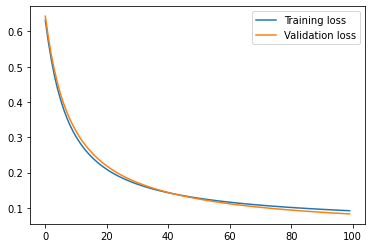

In [83]:
import matplotlib.pyplot as plt

# Plotting the loss

plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()

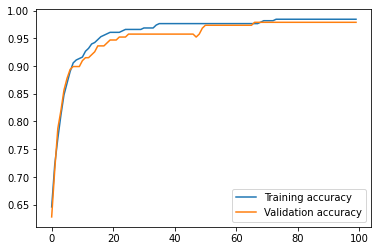

In [84]:
# Plotting the accuracy

plt.plot(r.history['accuracy'], label='Training accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()